In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dropout, Dense, SimpleRNN
import matplotlib.pyplot as plt

# Load Data

In [7]:
data = pd.read_parquet('train_data_leakage.parquet.gzip').to_numpy().astype(np.float32)

data = data[: int(0.7 * len(data))]

# Create and Train Model

In [8]:

def create_model():
    model = Sequential([
        LSTM(31, return_sequences=True, activation='tanh'),
        Dropout(0.23),
        LSTM(31, return_sequences=False, activation='tanh'),
        Dense(15, activation='linear'),
        Dense(15, activation='tanh'),
        Dense(1)
    ])

    model.compile(
        loss=['mean_absolute_error', "mean_squared_error"],
        optimizer = "adam",
        metrics=['mean_absolute_error', "mean_squared_error"]
    )
    
    return model

In [9]:
#we need to train the 29 Models 

models = []

for sensor_idx in range(1):
    
    inputs_idx = list(range(data.shape[1]));inputs_idx.remove(sensor_idx)
            
    X, y = data[:,inputs_idx], data[:,sensor_idx]
    
    X = np.array(X).reshape(X.shape[0], X.shape[1], 1)
    y = np.array(y).reshape(y.shape[0],1)
    
    model = create_model()
    
    with tf.device('/gpu:0'):
    
        hist = model.fit(X,y,batch_size=512, epochs=20, validation_split=0.2)
    
    models.append({'model_id' : sensor_idx, 'model' : model, 'hist' : hist, 'inputs_idx':inputs_idx})

Epoch 1/20


2023-11-29 11:46:30.074813: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:46:30.302624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:46:30.929414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:46:32.339537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:46:33.612631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9925/9925 [==============================] - ETA: 0s - loss: 3.8406 - mean_absolute_error: 3.8406 - mean_squared_error: 86.4776

2023-11-29 11:49:46.999999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:49:47.057416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-11-29 11:49:47.493449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


9925/9925 [==============================] - 220s 22ms/step - loss: 3.8406 - mean_absolute_error: 3.8406 - mean_squared_error: 86.4776 - val_loss: 0.0510 - val_mean_absolute_error: 0.0510 - val_mean_squared_error: 0.0050
Epoch 2/20
9925/9925 [==============================] - 210s 21ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - mean_squared_error: 0.0028 - val_loss: 0.0368 - val_mean_absolute_error: 0.0368 - val_mean_squared_error: 0.0040
Epoch 3/20
9925/9925 [==============================] - 210s 21ms/step - loss: 0.0270 - mean_absolute_error: 0.0270 - mean_squared_error: 0.0022 - val_loss: 0.0331 - val_mean_absolute_error: 0.0331 - val_mean_squared_error: 0.0040
Epoch 4/20
9925/9925 [==============================] - 211s 21ms/step - loss: 0.0251 - mean_absolute_error: 0.0251 - mean_squared_error: 0.0019 - val_loss: 0.0401 - val_mean_absolute_error: 0.0401 - val_mean_squared_error: 0.0047
Epoch 5/20
9925/9925 [==============================] - 213s 21ms/step - loss: 0.0240 

In [68]:
model_1 = models[0]['model']
model_2 = models[1]['model']
model_3 = models[2]['model']

h_1 = models[0]['hist'].history
h_2 = models[1]['hist'].history
h_3 = models[2]['hist'].history

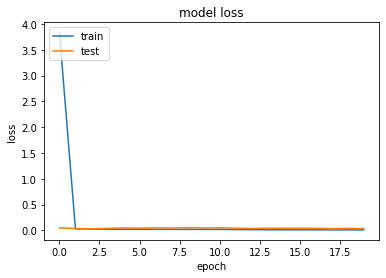

In [13]:
#plot the metrics during the training
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

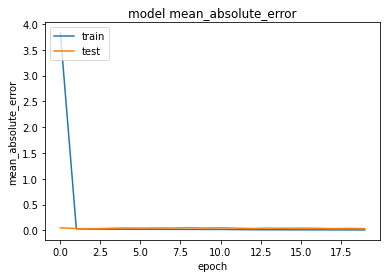

In [14]:
plt.plot(hist.history['mean_absolute_error'])
plt.plot(hist.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

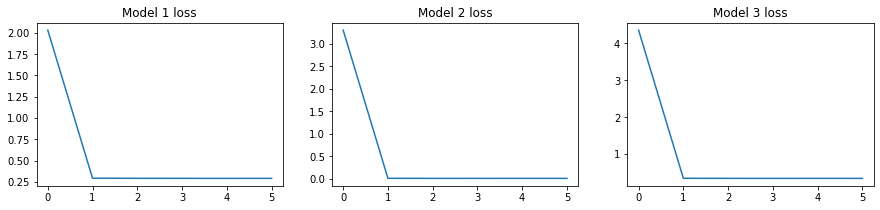

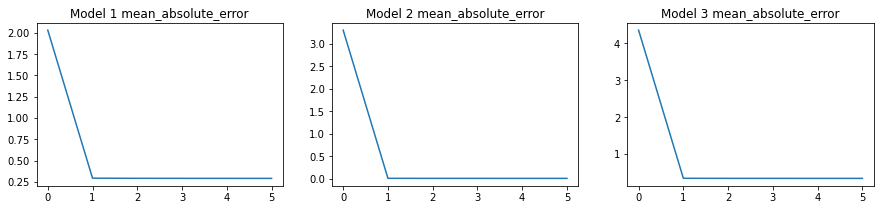

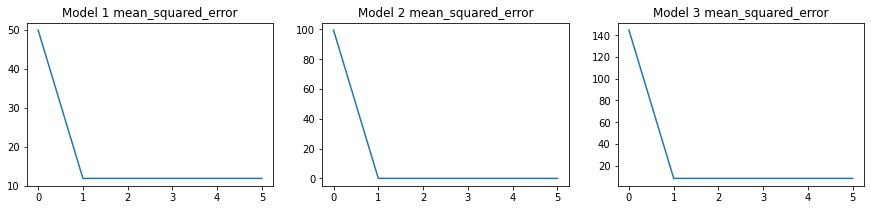

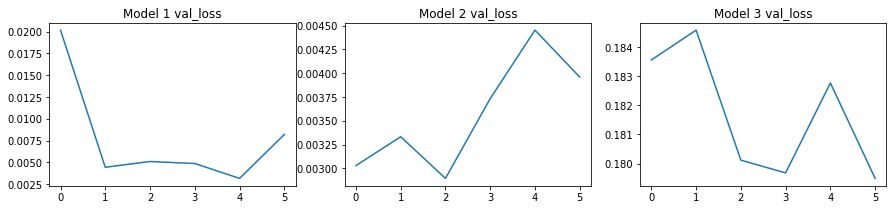

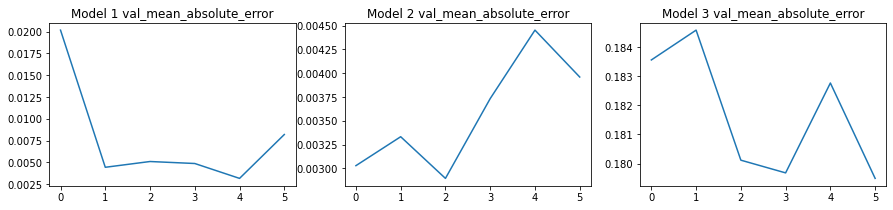

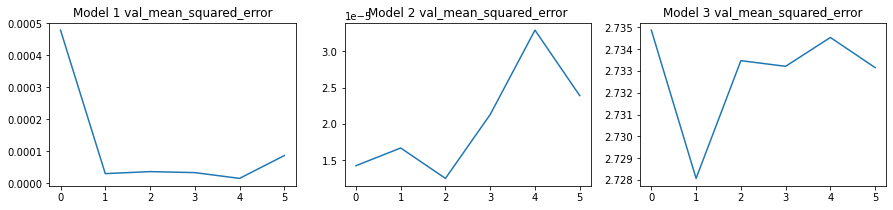

In [90]:

for key in h_1.keys():
    
    # Plots erstellen
    fig, axes = plt.subplots(1, 3, figsize=(15, 3))

    axes[0].plot(h_1[key])
    axes[0].set_title(f"Model 1 {key}")

    axes[1].plot(h_2[key])
    axes[1].set_title(f"Model 2 {key}")

    axes[2].plot(h_3[key])
    axes[2].set_title(f"Model 3 {key}")
    
    plt.show()

In [154]:
import os
test_data_path_0 = '/Users/florianwicher/Desktop/TestData/SensorFaultScenariosTest_1'



In [181]:
path = os.path.join(test_data_path_0, '7_sensor_fault_test_data.parquet.gzip')
test_data = pd.read_parquet(path).to_numpy().astype(np.float32)
test_data

array([[38.13, 50.82, 54.3 , ..., 48.78, 36.59, 46.33],
       [38.14, 50.83, 54.31, ..., 48.79, 35.03, 45.38],
       [38.2 , 50.87, 54.37, ..., 48.82, 28.35, 37.54],
       ...,
       [38.11, 80.  , 54.25, ..., 48.79, 36.23, 50.61],
       [38.09, 80.  , 54.26, ..., 48.76, 40.78, 51.28],
       [38.13, 80.  , 54.33, ..., 48.78, 37.12, 44.64]], dtype=float32)

In [182]:
X_1 = test_data[:, models[0]['inputs_idx']]
X_2 = test_data[:, models[1]['inputs_idx']]
X_3 = test_data[:, models[2]['inputs_idx']]


y_true_1 = test_data[:,0]
y_true_2 = test_data[:,1]
y_true_3 = test_data[:,2]


In [183]:
pred_1 = models[0]['model'].predict(X_1).flatten()
pred_2 = models[1]['model'].predict(X_1).flatten()
pred_3 = models[2]['model'].predict(X_1).flatten()

531/531 [==============================] - 2s 4ms/step


In [184]:
#plt.figure(figsize=(15,5))
#plt.plot(y_true_1);

In [185]:
#plt.figure(figsize=(15,5))
#plt.plot(pred_1[5000:])
#plt.plot(y_true_1[5000:])
#plt.show();

In [186]:
#plt.figure(figsize=(15,5))
#plt.plot(pred_2[:2000])
#plt.plot(y_true_2[:2000])
#plt.show();

In [187]:
#plt.figure(figsize=(15,5))
#plt.plot(pred_3[:2000])
#plt.plot(y_true_3[:2000])
#plt.show();

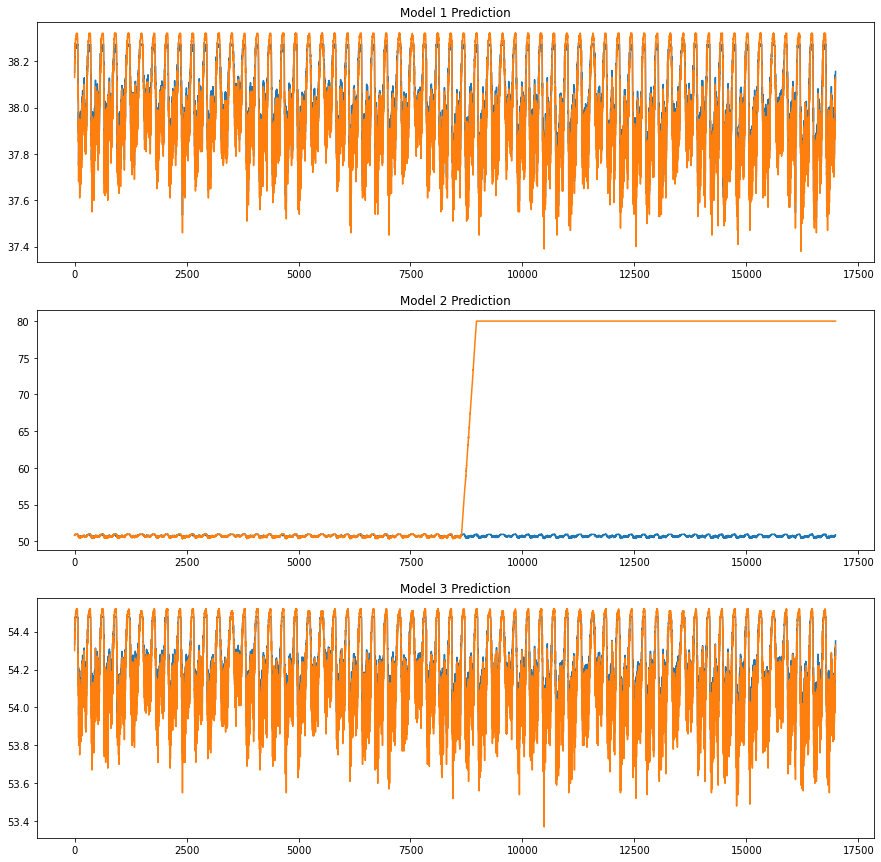

In [188]:
# Plots erstellen

seq_len = y_true_1.size
fig, axes = plt.subplots(3, 1, figsize=(15, 15))

axes[0].plot(pred_1[:seq_len])
axes[0].plot(y_true_1[:seq_len])
axes[0].set_title(f"Model 1 Prediction")

axes[1].plot(pred_2[:seq_len])
axes[1].plot(y_true_2[:seq_len])
axes[1].set_title(f"Model 2 Prediction")

axes[2].plot(pred_3[:seq_len])
axes[2].plot(y_true_3[:seq_len])
axes[2].set_title(f"Model 3 Prediction")
    
plt.show()